# Linear Regression Implementation with Gradient Descent

This Python script shows how to create a linear regression model using gradient descent to predict prices based on coordinate data. We start by loading a dataset that has coordinates and their corresponding prices. This dataset helps us understand how different factors can affect pricing.

To improve our model’s performance, we first normalize the features. This step makes sure that all the data is on a similar scale, which is important for training the model. Then, we define a hypothesis function that allows our linear model to make predictions.

To measure how accurate our predictions are, we use a cost function. This function calculates the mean squared error between the predicted prices and the actual prices. It helps us see how well we are doing and what changes we need to make.

Next, we use gradient descent to update the model’s parameters step by step, which helps us reduce the cost. With each iteration, we get closer to finding the best solution.

After we have the optimal parameters, we print them out. Finally, we create a scatter plot that displays the original data alongside the fitted regression line. This visual shows how well our model predicts prices based on the coordinates we provided.

To understand each part of the code better, [click here.]()

To unserstand the theory of linear regression using ngradient descent, [click here.](Linear_Regression_Theory.ipynb)

Optimal parameters: θ_0 = 74.47755198539215, θ_1 = 14.779274795780136
Final cost: 10.186314291778345


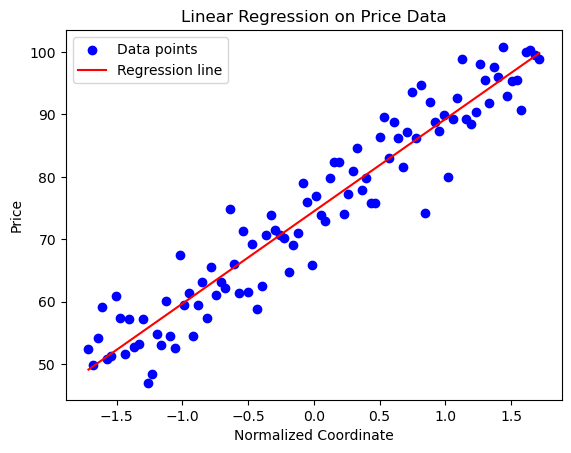

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('synthetic_price_data.csv')
X = data['Coordinate'].values
y = data['Price'].values

# Ensure the shape is correct
m = len(y)

# Normalize features (optional)
X = (X - np.mean(X)) / np.std(X)

# Hypothesis function
def hypothesis(X, theta):
    return theta[0] + theta[1] * X

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    predictions = hypothesis(X, theta)
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost

# Gradient descent function
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = np.zeros(num_iterations)
    
    for i in range(num_iterations):
        predictions = hypothesis(X, theta)
        errors = predictions - y
        gradients = (1 / m) * np.array([np.sum(errors), np.sum(errors * X)])
        theta = theta - alpha * gradients
        cost_history[i] = compute_cost(X, y, theta)
    
    return theta, cost_history

# Initializing parameters
alpha = 0.01  # Learning rate
num_iterations = 1000
initial_theta = np.zeros(2)  # Initial parameters [theta_0, theta_1]

# Calling gradient descent function
optimal_theta, cost_history = gradient_descent(X, y, initial_theta, alpha, num_iterations)

# Printing the results
print(f"Optimal parameters: θ_0 = {optimal_theta[0]}, θ_1 = {optimal_theta[1]}")
print(f"Final cost: {cost_history[-1]}")

# Plotting the dataset and the linear regression line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, hypothesis(X, optimal_theta), color='red', label='Regression line')
plt.xlabel('Normalized Coordinate')
plt.ylabel('Price')
plt.title('Linear Regression on Price Data')
plt.legend()
plt.show()


## Evaluating the Accuracy of the Regression Model

When it comes to assessing how well our regression model performs, the **R² value** is a crucial tool. Think of R² as a score that tells us how much of the outcome (the dependent variable) our model can explain based on the input data (the independent variables).

If the R² value is close to 1, it means our model is doing a great job at capturing the relationships in the data, effectively predicting outcomes. This is like having a reliable friend who knows exactly what you need in various situations!

On the other hand, if the R² value is significantly lower than 1, it suggests that our model isn't quite hitting the mark. This could mean that important factors are missing or that the model isn't capturing the patterns in the data as well as it should.

In summary, a higher R² value is what we aim for; it reflects a strong and accurate model that can give us valuable insights and predictions based on the data we have.


In [2]:
# Function to calculate R² value
def r_squared(y_true, y_pred):
    # Total sum of squares
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    # Residual sum of squares
    ss_residual = np.sum((y_true - y_pred) ** 2)
    # R² calculation
    r2 = 1 - (ss_residual / ss_total)
    return r2

# Calculate predictions using the optimal parameters
predictions = hypothesis(X, optimal_theta)

# Calculate R² value
r2_value = r_squared(y, predictions)

# Print the R² value
print(f"R² value: {r2_value}")


R² value: 0.9146940730105249
